# Functions

Julia is first and foremost a functional language because computations and data
transformations are done through functions; they are first-class citizens in Julia. Programs
are structured around defining functions and to overload them for different combinations
of argument types. This chapter discusses this keystone concept, covering the following
topics:

- Defining functions
- Optional and keyword arguments
- Anonymous functions
- First-class functions and closures
- Recursive functions
- Broadcasting
- Map, filter, and list comprehensions
- Generic functions and multiple dispatch

# Defining functions

A function is an object that gets a number of arguments (the argument list, arglist) as the
input, then does something with these values in the function body, and returns none, one,
or more value(s)

Multiple arguments are separated by commas (,) in an arglist (in fact,
they form a tuple, as do the return values

The arguments are also optionally typed, and the type(s) can be user-defined. The
general syntax is as follows:

In [2]:
function foo(args)
    return args
end


foo (generic function with 1 method)

A function's argument list can also be empty

In [5]:
function multi(x, y)
    print("The values to multiply include: \n $x, $y \n And the result is $(x*y)")
    return x*y
end

    
    

multi (generic function with 1 method)

In [7]:
multi(10,10);

The values to multiply include: 
 10, 10 
 And the result is 100

Function names such as mult are, by convention, in lower-case. They can contain Unicode
characters, which are useful in mathematical notations.

The return keyword in the last line
is optional; we could have written the line as x * y.

In [8]:
function multi(x, y)
    print("The values to multiply include: \n $x, $y \n And the result is $(x*y)")
    x*y
end

    
    

multi (generic function with 1 method)

In [10]:
multi(10,10)

The values to multiply include: 
 10, 10 
 And the result is 100

100

In general, the value of the last
expression in the function is returned, but writing return is mostly a good idea in
multiline functions to increase readability.

if you
only need its side-effects (that is, how the function affects the program state; for instance, by
changing the global variables). The return keyword can also be used within a condition in
other parts of the function body to exit the function earlier, as in this example:

In [12]:
function mult(x, y)
    println("x is $x and y is $y")
    if x == 1
        return 
    end
    x * y
end

mult (generic function with 1 method)

In [16]:
a = mult(1,10)

x is 1 and y is 10


In [18]:
typeof(a)

Nothing

In this case, return can also be used without a value so that the function returns nothing.

Functions are not limited to returning a single value. Here is an example with multiple
return values:

In [22]:
function custom_fn(n, m)
    return n*m, div(n,m), n%m
end


custom_fn (generic function with 1 method)

In [23]:
custom_fn(10,4)

(40, 2, 2)

The return values can be
extracted to other variables such as

In [24]:
a, b, c = custom_fn(10,4)

(40, 2, 2)

In [25]:
a

40

In [26]:
b

2

In [27]:
c

2

In fact, you can say that Julia always returns a single value,
but this value can be a tuple that can be used to pass multiple variables back to the
program.

We can also have a variable with a number of arguments using the ellipsis operator
(...). An example of this operator is as follows:

In [29]:
function varargs(n, m, args...)
    println("$n, $m, $args")
end


varargs (generic function with 1 method)

In [31]:
a = varargs(1,2,3,4,5,6);

1, 2, (3, 4, 5, 6)


Here, n and m are just positional arguments (there can be more or none at all). The args...
argument takes in all the remaining parameters in a tuple. If we call the function with
varargs(1, 2, 3, 4), then n is 1, m is 2, and args has the value (3, 4)

The same
splat operator can also be used to unpack a tuple or an array into individual arguments. For
example, we can define a second variable argument function as follows:

In [37]:
a = collect(1:10);

In [38]:
varargs(a...)

1, 2, (3, 4, 5, 6, 7, 8, 9, 10)


The receiving function does
not need to be a variable argument function, but then the number of spliced parameters
must exactly match the number of arguments

In [39]:
function f(a,b)
    return a,b
end


f (generic function with 1 method)

In [40]:
f = f(a...)

LoadError: MethodError: no method matching f(::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  f(::Any, ::Any) at In[39]:1

It is important to realize that, in Julia, all arguments to functions (with the exception of
plain data such as numbers and chars) are passed by reference

Their values are not copied
when they are passed, which means they can be changed from inside the function, and the
changes will be visible to the calling code

In [65]:
function f(a)
    a = 20
    return 
end


f (generic function with 2 methods)

In [66]:
b = 100

100

In [67]:
f(b)

In [68]:
b

100

The above was an example of plain data

In [69]:
function f(a)
    push!(a,100)
    return 
end


f (generic function with 2 methods)

In [70]:
b = [1, 2]

2-element Vector{Int64}:
 1
 2

In [71]:
f(b)

In [72]:
b

3-element Vector{Int64}:
   1
   2
 100

The above was an example of non plain data

Due to the way Julia compiles, a function must be defined by the time it is actually called
(but it can be used before that in other function definitions).

It can also be useful to indicate the argument types, to restrict the kind of parameters
passed when calling. Our function header for floating point numbers would then look
like: function mult(x::Float64, y::Float64).

When this is the only mult function,
and we call this function with mult(5, 6), we receive an error, ERROR: MethodError:
no method matching mult(::Int64, ::Int64), proving that Julia is indeed a
strongly typed language. It does not accept integer parameters for floating point
arguments.

If we define a function without types, it is generic; the Julia JIT compiler is ready to
generate versions called methods for different argument types when needed. Define the
previous function mult in the REPL, and you will see the output as mult (generic
function with 1 method).

There is also a more compact, one-line function syntax (the assignment form) for short
functions, for example, mult(x, y) = x * y. Use this, preferably, for simple one-line
functions, as it will lend the code greater clarity. Because of this, mathematical functions
can also be written in an intuitive form:

In [74]:
f(x, y) = x^3 - y + x * y

f (generic function with 2 methods)

In [75]:
f(2,4)

12

A function defines its own scope. The set of variables that are declared inside a function are
only known inside the function, and this is also true for the arguments.

Functions can be
defined as top-level (global) or nested (a function can be defined within another function).
Usually, functions with related functionality are grouped in their own Julia file, which is
included in a main file. Or, if the function is big enough, it can have its own file, preferably
with the same name as the function.

# Optional and keyword arguments 

When defining functions, one or more arguments can be given a default value such as
f(arg = val). If no parameter is supplied for arg, then val is taken as the value of arg.

The position of these arguments in the function's input is important, just as it is for
normal arguments; that's why they are called optional positional arguments.

In [76]:
f(a, b=15) = a*b

f (generic function with 2 methods)

In [77]:
f(1)

15

In [1]:
custom_function(a::Int64=32, b::Int64=15) = a*b

custom_function (generic function with 3 methods)

In [2]:
custom_function()

480

In [3]:
custom_function(10,b=23)

LoadError: MethodError: no method matching custom_function(::Int64; b=23)
[0mClosest candidates are:
[0m  custom_function(::Int64) at In[1]:1[91m got unsupported keyword argument "b"[39m
[0m  custom_function(::Int64, [91m::Int64[39m) at In[1]:1[91m got unsupported keyword argument "b"[39m
[0m  custom_function() at In[1]:1[91m got unsupported keyword argument "b"[39m

no method matching custom_function(::Int64; b=23)

Notice the above Error

These arguments are still only defined by position:
calling f(2, b = 5) raises an error as ERROR: function f does not accept
keyword arguments.

Until now, arguments were only defined by position. For code clarity, it can be useful to
explicitly call them by name, so they are called optional keyword arguments. Because the
arguments are given explicit names, their order is irrelevant, but they must come last and
be separated from the positional arguments by a semi-colon (;)

In [88]:
custom_function(;a::Int64, b::Int64=15) = a*b

custom_function (generic function with 3 methods)

In [90]:
custom_function(b=23, a=23)

529

Normal, optional positional, and keyword arguments can be combined as
follows:

In [95]:
function allargs(normal_arg, optional_positional_arg=2; keyword_arg="ABC")
    println("normal arg: $normal_arg" )
    println("optional arg: $optional_positional_arg" )
    println("keyword arg: $keyword_arg")
end

allargs (generic function with 2 methods)

In [96]:
allargs(1, 3, keyword_arg=4)

normal arg: 1
optional arg: 3
keyword arg: 4


A useful case is when the keyword arguments are splatted as follows:

In [107]:
function f(;args...)
#     println(args)
    show(args)
end


f (generic function with 5 methods)

In [108]:
f(k1="WTF",k2="OTG",c=pi)

Base.Iterators.Pairs{Symbol, Any, Tuple{Symbol, Symbol, Symbol}, NamedTuple{(:k1, :k2, :c), Tuple{String, String, Irrational{:π}}}}(:k1 => "WTF", :k2 => "OTG", :c => π)

Calling this with varargs2(k1="name1", k2="name2", k3=7) returns
pairs(::NamedTuple) with three entries: (:k1,"name1") (:k2,"name2") (:k3,7).

Now, args is a collection of (key, value) tuples, where each key comes from the name of
the keyword argument, and it is also a symbol (refer to the Strings section of Chapter 2,
Variables, Types, and Operations) because of the colon (:) as prefix.

# Anonymous functions

The function f(x, y) at the end of the Defining functions section can also be written with
no name, as an anonymous function: (x, y) -> x^3 - y + x * y. We can, however,
bind it to a name, such as f = (x, y) -> x^3 - y + x * y, and then call it, for
example, as f(3, 2).

In [113]:
cf = (x,y) -> x+y 

#14 (generic function with 1 method)

In [114]:
cf(10,10)

20

In [118]:
function ()
    print("What the heck is going on here :)")
end


#18 (generic function with 1 method)

In [119]:
ans()

What the heck is going on here :)

In [121]:
() -> print("What the heck is going on here")

#20 (generic function with 1 method)

In [122]:
ans()

What the heck is going on here

Here is an anonymous function taking three arguments: (x, y, z) -> 3x + 2y - z.
When the performance is important, try to use named functions instead, because calling
anonymous functions involves a huge overhead

Anonymous functions are mostly used
when passing a function as an argument to another function, which is precisely what we
will discuss in the next section.

# First-class functions and closures

Firstly, functions have their own type:
Function. Functions can also be assigned to a variable by their name:

In [125]:
mult(x,y) = x*y

mult (generic function with 1 method)

In [126]:
m = mult

mult (generic function with 1 method)

In [127]:
m(10,20)

200

This is useful when working with anonymous functions, such as c = x -> x + 2, or as
follows:

In [129]:
plasto =
function (x)
    x+2
end


#24 (generic function with 1 method)

In [130]:
plasto(20)

22

Operators are just functions written with their arguments in an infix form; for example, x +
y is equivalent to +(x, y).

In [10]:
+(10,20)

30

In [11]:
typeof(+)

typeof(+) (singleton type of function +, subtype of Function)

In [12]:
typeof(-)

typeof(-) (singleton type of function -, subtype of Function)

A function can take a function (or multiple functions) as its argument, which calculates the
numerical derivative of a function f;

In [15]:
function numerical_derivative(f, x, dx=.01)
    derivative = (f(x+dx)-f(x))/(dx)
    return derivative
end


numerical_derivative (generic function with 2 methods)

In [16]:
f(x) = x^3

f (generic function with 1 method)

In [17]:
numerical_derivative(f,4)

48.120099999998445

A function can also return another function (or multiple functions) as its value. This is
demonstrated in the following code, which calculates the derivative of a function (this is
also a function):

In [18]:
function derivative(f)
    return function(x)
        # pick a small value for h
        h = x == 0 ? sqrt(eps(Float64)) : sqrt(eps(Float64)) .* x
        xph = x + h
        dx = xph - x
        f1 = f(xph) # evaluate f at x + h
        f0 = f(x) # evaluate f at x
        return (f1 - f0) ./ dx # divide by h
    end
end

derivative (generic function with 1 method)

In [136]:
f(x) = sin.(x) .^ 3 .+ 7*cos.(sqrt.(x) .+4)

f (generic function with 1 method)

In [137]:
df = derivative(f)

#1 (generic function with 1 method)

In [142]:
x = collect(0:.01:5);

In [143]:
ff = f(x);

In [144]:
fdf = df(x);

In [145]:
using Plots

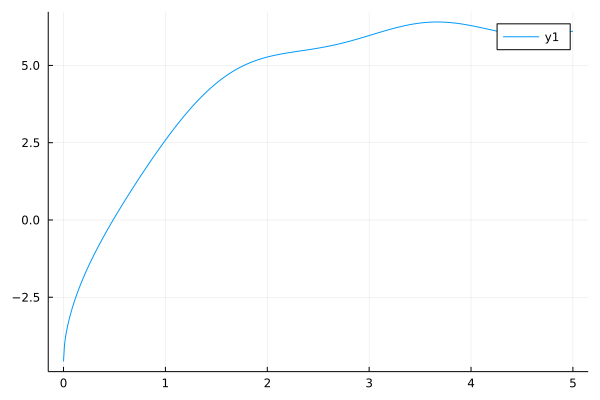

In [146]:
plot(x,ff)

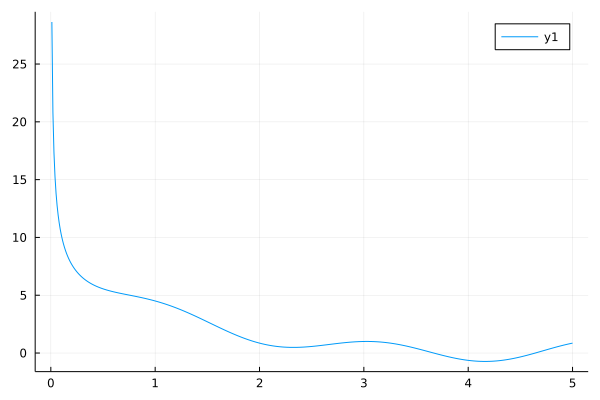

In [147]:
plot(x,fdf)

Here is an example of a counter function that returns (a tuple of) two anonymous
functions:

In [149]:
function counter()
    n = 0
    return ()-> n +=1, ()->n = 0
end


counter (generic function with 1 method)

In [150]:
add, reset = counter()

(var"#3#5"(Core.Box(0)), var"#4#6"(Core.Box(0)))

In [157]:
add()

5

In [158]:
reset()

0

In [159]:
add()

1

What we see is that, in the counter function, the variable n is captured in the anonymous
functions. It can only be manipulated by the functions, addOne and reset. The two
functions are said to be closed over the variable n and both have references to n. That's why
they are called closures.

Currying (also called a partial application) is the technique of translating the evaluation of
a function that takes multiple arguments (or a tuple of arguments) into evaluating a
sequence of functions, each with a single argument. Here is an example of function

LoadError: UndefVarError: clear! not defined

In [170]:
function add_x(x)
    return function f(y)
        return x + y
    end
end

add_x (generic function with 1 method)

In [171]:
add_2 = add_x(2)

(::var"#f#9"{Int64}) (generic function with 1 method)

In [172]:
add_2(98)

100

In [174]:
add_x(1)(2)

3

This example can be written more
succinctly as add(x) = f(y) = x + y

In [177]:
add_x(x) = f(y) = x + y

add_x (generic function with 1 method)

In [179]:
add_x(2)(3)

5

# Nested Functions 

In [180]:
function a(x)
    z = x * 2
    function b(z)
        z += 1
    end
    b(z)
end


a (generic function with 1 method)

In [182]:
a(5)

11

A function can also be recursive, that is, it can call itself. To show some examples, we need
to be able to test a condition in code.

The simplest way to do this in Julia is to use the
ternary operator ? of the form expr ? b : c (ternary because it takes three arguments).
Julia also has a normal if construct.

In [189]:
sum(n) = n > 1 ? sum(n-1) + n : n

sum (generic function with 1 method)

In [190]:
sum(9)

45

In [191]:
fib(n) = n > 1 ? fib(n-1) * n : n

fib (generic function with 1 method)

In [196]:
fib(n) = n < 3 ? n : fib(n-1) + fib(n-2) + fib(n-3)

fib (generic function with 1 method)

In [198]:
fib(10)

230

# Broadcasting

A function f can be broadcast over all elements of an array (or matrix) by using the dot
notation f.(matrix

In [200]:
arr = collect(1:10);

In [201]:
sin(arr)

LoadError: MethodError: no method matching sin(::Vector{Int64})
[0mClosest candidates are:
[0m  sin([91m::T[39m) where T<:Union{Float32, Float64} at /usr/share/julia/base/special/trig.jl:29
[0m  sin([91m::LinearAlgebra.Hermitian{var"#s858", S} where {var"#s858"<:Complex, S<:(AbstractMatrix{<:var"#s858"})}[39m) at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:761
[0m  sin([91m::Union{LinearAlgebra.Hermitian{var"#s859", S}, LinearAlgebra.Symmetric{var"#s859", S}} where {var"#s859"<:Real, S}[39m) at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:757
[0m  ...

In [202]:
sin.(arr)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

In [203]:
f(x,y,z) = x ^ 3 + y * x -z

f (generic function with 2 methods)

In [205]:
f.(arr,arr,arr)

10-element Vector{Int64}:
    1
   10
   33
   76
  145
  246
  385
  568
  801
 1090

# Map, filter, and list comprehensions 

Maps and filters are typical for functional languages. A map is a function of the form
map(func, coll), where func is a (often anonymous) function that is successively
applied to every element of the coll collection, so map returns a new collection

In [208]:
show(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [212]:
d = map(sin,arr)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

In [214]:
d = map((x)->sin(x),arr)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

The map function can also be used with functions that take more than one argument. In this
case, it requires a collection for each argument; for example, map(*, [1, 2, 3], [4, 5,
6]) works per element and returns [4, 10, 18].

In [215]:
map(*, [1, 2, 3,], [2, 3, 4])

3-element Vector{Int64}:
  2
  6
 12

When the function passed to map requires several lines, it can be a bit unwieldy to write as
an anonymous function. For instance, consider using the following function:

In [219]:
map(x-> begin
        if x == 0 return 0
            elseif iseven(x) return 2
            elseif isodd(x) return 1
        end
    end
,collect(-3:3))


7-element Vector{Int64}:
 1
 2
 1
 0
 1
 2
 1

This can be simplified with a do block as follows:

In [221]:
map(collect(-3:3)) do x
    if x == 0 return 0
    elseif iseven(x) return 2
    elseif isodd(x) return 1
    end
end
    

7-element Vector{Int64}:
 1
 2
 1
 0
 1
 2
 1

The do x statement creates an anonymous function with the argument x and passes it as
the first argument to map.

A filter is a function of the form filter(func, coll), where func is a (often
anonymous) Boolean function that is checked on each element of the collection coll. Filter
returns a new collection with only the elements on which func is evaluated to be true. For
example, the following code filters the even numbers and returns [2, 4, 6, 8, 10]:

In [231]:
filter(x -> rand(Bool),collect(-3:3))

2-element Vector{Int64}:
 0
 3

An incredibly powerful and simple way to create an array is to use a list comprehension.
This is a kind of implicit loop which creates the result array and fills it with values. Some
examples are as follows:

In [232]:
arr = Float64[x ^ 3 for x in -3:3]

7-element Vector{Float64}:
 -27.0
  -8.0
  -1.0
   0.0
   1.0
   8.0
  27.0

In [233]:
cubes = Float64[x ^ 3 for x in collect(-3:3)]

7-element Vector{Float64}:
 -27.0
  -8.0
  -1.0
   0.0
   1.0
   8.0
  27.0

In [234]:
cube = Float64[sqrt(x ^ 2 + y ^ 2 + z ^ 2) for x in 0:10, y in -5:5, z in 3:13]

11×11×11 Array{Float64, 3}:
[:, :, 1] =
  5.83095   5.0       4.24264   3.60555  …   4.24264   5.0       5.83095
  5.91608   5.09902   4.3589    3.74166      4.3589    5.09902   5.91608
  6.16441   5.38516   4.69042   4.12311      4.69042   5.38516   6.16441
  6.55744   5.83095   5.19615   4.69042      5.19615   5.83095   6.55744
  7.07107   6.40312   5.83095   5.38516      5.83095   6.40312   7.07107
  7.68115   7.07107   6.55744   6.16441  …   6.55744   7.07107   7.68115
  8.3666    7.81025   7.34847   7.0          7.34847   7.81025   8.3666
  9.11043   8.60233   8.18535   7.87401      8.18535   8.60233   9.11043
  9.89949   9.43398   9.05539   8.77496      9.05539   9.43398   9.89949
 10.7238   10.2956    9.94987   9.69536      9.94987  10.2956   10.7238
 11.5758   11.1803   10.8628   10.6301   …  10.8628   11.1803   11.5758

[:, :, 2] =
  6.40312   5.65685   5.0       4.47214  …   5.0       5.65685   6.40312
  6.48074   5.74456   5.09902   4.58258      5.09902   5.74456   6.48074
 

# Generic functions and multiple dispatch

We have already seen that functions are inherently defined as generic, that is, they can be
used for different types of their arguments. The compiler will generate a separate version of
the function each time it is called with arguments of a new type

In Julia, a concrete version
of a function for a specific combination of argument types is called a method

To define a
new method for a function (also called overloading), just use the same function name but a
different signature, that is, with different argument types.

A list of all the methods is stored
in a virtual method table (vtable) on the function itself

; methods do not belong to a
particular type.

When a function is called, Julia will lookup in vtable at runtime to find
which concrete method it should call, based on the types of all its arguments; this is
Julia's multiple dispatch mechanism, which Python, C++, or Fortran do not implement this

Note that only
positional arguments are taken into account for multiple dispatch, and not keyword
arguments.

For each of these different methods, specialized low-level code is generated, targeted to the
processor's instruction set. In contrast to object-oriented (OO) languages, vtable is stored
in the function, and not in the type (or class)

In OO languages, a method is called on a
single object, object.method(), which is generally called single dispatch. In Julia, one
can say that a function belongs to multiple types, or that a function is specialized or
overloaded for different types

Julia's ability to compile code that reads like a high-level
dynamic language into machine code that performs almost entirely like C is derived from
its ability to do multiple dispatch.

Number is a supertype of Integer

In [242]:
f(n, m) = "base case"
f(n::Number, m::Number) = "n and m are both Numbers"
f(n::Number, m) = "n is a number"
f(n, m::Number) = "m is a number"
f(n::Integer, m::Integer) = "n and m are both Integers"

f (generic function with 7 methods)

In [244]:
f(2,3)

"n and m are both Integers"

In [245]:
f(2,"what")

"n is a number"

In [246]:
f("what",2)

"m is a number"

In [247]:
f(3.0,3.3)

"n and m are both Numbers"

In [248]:
f("what", "the heck")

"base case"

Calling f(n, m) will never result in an error, because if no other method matches, the base
case will be invoked when we add a new method:

To get a quick overview of all the versions of a function, type methods(fname) into the
REPL.

In [249]:
methods(f)

# 7 methods for generic function "f":
[1] f(n::Integer, m::Integer) in Main at In[242]:5
[2] f(n::Number, m::Number) in Main at In[242]:2
[3] f(n, m::Number) in Main at In[242]:4
[4] f(n::Number, m) in Main at In[242]:3
[5] f(y) in Main at In[176]:1
[6] f(n, m) in Main at In[242]:1
[7] f(x, y, z) in Main at In[203]:1

In [251]:
methods(add)

# 1 method for anonymous function "#3":
[1] (::var"#3#5")() in Main at In[149]:3

In [253]:
# methods(+)

The macro @which gives you the exact method that is used and where in the source code
that method is defined, for example, @which 2 * 2 returns *(x::Int64, y::Int64) at
int.jl:47.

In [255]:
@which 2 * 2

*(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:88

This also works the other way around. If you want to know which methods are
defined for a certain type, or use that type, ask methodswith(Type) from the
InteractiveUtils module

In [257]:
methodswith(String)

[1] filter(f, s::Union{SubString{String}, String}) in Base at strings/substring.jl:242
[2] length(s::String) in Base at strings/string.jl:272
[3] length(s::String, i::Int64, j::Int64) in Base at strings/string.jl:274
[4] reverse(s::Union{SubString{String}, String}) in Base at strings/substring.jl:166
[5] ColorSchemes.ColorSchemeCategory(name::String) in ColorSchemes at /home/javid/.julia/packages/ColorSchemes/p8fep/src/ColorSchemes.jl:51
[6] Animation(dir::String, frames::Vector{String}) in Plots at /home/javid/.julia/packages/Plots/UeTBV/src/animation.jl:3
[7] colormap(cname::String) in Colors at /home/javid/.julia/packages/Colors/yDxFN/src/colormaps.jl:283
[8] colormap(cname::String, N::Int64; mid, logscale, kvs...) in Colors at /home/javid/.julia/packages/Colors/yDxFN/src/colormaps.jl:283
[9] ZMQ.Message(m::String) in ZMQ at /home/javid/.julia/packages/ZMQ/R3wSD/src/message.jl:76
[10] subscribe(socket::ZMQ.Socket, filter::Union{String, Vector{UInt8}}) in ZMQ at /home/javid/.julia/packages/ZMQ/R3wSD/src/sockopts.jl:75
[11] unsubscribe(socket::ZMQ.Socket, filter::Union{String, Vector{UInt8}}) in ZMQ at /home/javid/.julia/packages/ZMQ/R3wSD/src/sockopts.jl:75
[12] artifact_hash(name::String, artifacts_toml::String; platform, pkg_uuid) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:419
[13] artifact_meta(name::String, artifact_dict::Dict, artifacts_toml::String; platform) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:378
[14] artifact_meta(name::String, artifacts_toml::String; platform, pkg_uuid) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:366
[15] find_artifacts_toml(path::String) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:484
[16] select_downloadable_artifacts(artifact_dict::Dict, artifacts_toml::String; platform, pkg_uuid, include_lazy) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:430
[17] select_downloadable_artifacts(artifacts_toml::String; platform, include_lazy, pkg_uuid) in Artifacts at /usr/share/julia/stdlib/v1.7/Artifacts/src/Artifacts.jl:462
[18] FileWatching.FileMonitor(file::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:80
[19] FileWatching.FolderMonitor(folder::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:102
[20] FileWatching.PollingFileWatcher(file::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:131
[21] FileWatching.PollingFileWatcher(file::String, interval::Float64) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:131
[22] unwatch_folder(s::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:780
[23] watch_file(s::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:701
[24] watch_file(s::String, timeout_s::Float64) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:701
[25] watch_folder(s::String) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:735
[26] watch_folder(s::String, timeout_s::Real) in FileWatching at /usr/share/julia/stdlib/v1.7/FileWatching/src/FileWatching.jl:735
[27] vparse(s_::String) in VersionParsing at /home/javid/.julia/packages/VersionParsing/YFVo1/src/VersionParsing.jl:39
[28] ==(a::String, b::String) in Base at strings/string.jl:118
[29] ==(a::Union{SubString{String}, String}, b::Union{SubString{String}, String}) in Base at strings/substring.jl:102
[30] DimensionMismatch(msg::String) in Base at array.jl:12
[31] IOBuffer(str::String) in Base at strings/io.jl:304
[32] InvalidStateException(msg::String, state::Symbol) in Base at channels.jl:298
[33] MissingException(msg::String) in Base at missing.jl:15
[34] abspath(a::String) in Base.Filesystem at path.jl:415
[35] ascii(s::String) in Base at strings/util.jl:777
[36] chomp(s::String) in Base at strings/util.jl:218


As already noted, type stability is crucial for optimal performance. A function is type-stable
if the return type(s) of all the output variables can be deduced from the types of the inputs.

Some crude performance measurements (execution time and memory used) on the
execution of functions can be obtained from the macro @time, for example:

In [263]:
@time fib(35)

  2.483461 seconds


950439251

In [264]:
@which(fib(2))

fib(n) in Main at In[196]:1

In [265]:
fib(n) = n < 2 ? n : fib(n-1) + fib(n-2)

fib (generic function with 1 method)

In [267]:
@time fib(35)

  0.054141 seconds


9227465

@elapsed only returns the execution time. @elapsed fib(35) returns 0.115188593.

In [269]:
@elapsed fib(35)

0.060157082

In Julia, the first call of a method invokes the LLVM JIT compiler backend (refer to the How
Julia works section in Chapter 1, Installing the Julia Platform), to emit machine code for it, so
this warm-up call will take a bit longer. Start timing or benchmarking from the second call
onward, after doing a dry run.